# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags

## Data Importing

In [2]:
# load one file first to see what type of data you're dealing with and what attributes it has
file_path ="/content/Supervised-learning/data/AK_Juneau_0.json"
with open (file_path) as f:
    data = json.load(f)
print(json.dumps(data, indent=4))

FileNotFoundError: [Errno 2] No such file or directory: '/content/Supervised-learning/data/AK_Juneau_0.json'

In [3]:
!git clone https://github.com/CuHzQuixote/Supervised-learning


Cloning into 'Supervised-learning'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 247 (delta 215), reused 225 (delta 205), pack-reused 0 (from 0)
Receiving objects: 100% (247/247), 3.48 MiB | 7.79 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:
# loop over all files and put them into a dataframe

In [4]:
# loop over all files and put them into a dataframe

import os
import json
import pandas as pd

# Path to folder containing JSON files
folder_path = "/content/Supervised-learning/data"

# List to store all property data
all_properties = []

# Set to track unique keys (for structure verification)
schema_set = set()

# Function to safely extract values from nested dictionaries
def safe_get(d, keys, default=None):
    """Safely fetches a nested key from a dictionary."""
    for key in keys:
        if isinstance(d, dict):
            d = d.get(key, default)
        else:
            return default
    return d

# Function to flatten property data
def flatten_property(property_item):
    """Extracts relevant fields and flattens nested dictionaries."""
    if property_item is None:
        return {}

    return {
        "property_id": safe_get(property_item, ["property_id"]),
        "status": safe_get(property_item, ["status"]),
        "list_date": safe_get(property_item, ["list_date"]),
        "list_price": safe_get(property_item, ["list_price"]),
        "sold_date": safe_get(property_item, ["description", "sold_date"]),
        "sold_price": safe_get(property_item, ["description", "sold_price"]),
        "year_built": safe_get(property_item, ["description", "year_built"]),
        "beds": safe_get(property_item, ["description", "beds"]),
        "baths": safe_get(property_item, ["description", "baths"]),
        "sqft": safe_get(property_item, ["description", "sqft"]),
        "lot_sqft": safe_get(property_item, ["description", "lot_sqft"]),
        "garage": safe_get(property_item, ["description", "garage"]),
        "type": safe_get(property_item, ["description", "type"]),
        "address": safe_get(property_item, ["location", "address", "line"]),
        "city": safe_get(property_item, ["location", "address", "city"]),
        "state": safe_get(property_item, ["location", "address", "state"]),
        "postal_code": safe_get(property_item, ["location", "address", "postal_code"]),
        "latitude": safe_get(property_item, ["location", "address", "coordinate", "lat"]),
        "longitude": safe_get(property_item, ["location", "address", "coordinate", "lon"]),
        "primary_photo": safe_get(property_item, ["primary_photo", "href"]),
    }

# Loop through JSON files in folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # Ensure it's a JSON file
        file_path = os.path.join(folder_path, file_name)

        with open(file_path, "r", encoding="utf-8") as f:
            try:
                data = json.load(f)
                if "data" in data and "results" in data["data"]:
                    for property_item in data["data"]["results"]:
                        flattened_data = flatten_property(property_item)
                        all_properties.append(flattened_data)
                        schema_set.add(frozenset(flattened_data.keys()))  # Store keys for consistency check

            except json.JSONDecodeError:
                print(f"Error reading {file_name}")

# Check for structural consistency
if len(schema_set) == 1:
    print("All files have the same structure.")
else:
    print("Files have different structures.")

# Convert to DataFrame
df = pd.DataFrame(all_properties)

# Display first few rows
print(df.head())

All files have the same structure.
  property_id status                    list_date  list_price   sold_date  \
0  6512480131   sold  2023-12-01T15:32:49.000000Z    215000.0  2024-01-12   
1  6066017818   sold  2023-12-09T19:47:39.000000Z    299000.0  2024-01-12   
2  6513905808   sold  2023-11-05T21:19:21.000000Z    415000.0  2024-01-12   
3  6592350617   sold  2023-12-13T23:09:04.000000Z    183000.0  2024-01-12   
4  5473936524   sold  2023-11-30T20:18:18.000000Z    520000.0  2024-01-12   

   sold_price  year_built  beds  baths    sqft  lot_sqft  garage  \
0    200000.0      1967.0   2.0    2.0  1024.0       NaN     NaN   
1    284900.0      1982.0   3.0    3.0  1792.0    3920.0     NaN   
2    415000.0      1955.0   2.0    2.0  1296.0   10454.0     NaN   
3    194628.0      1997.0   3.0    2.0  1222.0   41382.0     2.0   
4    520000.0      1988.0   4.0    2.0  2584.0   23958.0     2.0   

            type             address         city    state postal_code  \
0         condos   

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [ ]:
# load and concatenate data here
# drop or replace values as necessary

In [5]:
df.info()
df.describe(include='all')
df.applymap(lambda x: isinstance(x, list)).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    8159 non-null   object 
 1   status         8159 non-null   object 
 2   list_date      7752 non-null   object 
 3   list_price     7721 non-null   float64
 4   sold_date      8159 non-null   object 
 5   sold_price     6716 non-null   float64
 6   year_built     7316 non-null   float64
 7   beds           7504 non-null   float64
 8   baths          7980 non-null   float64
 9   sqft           7323 non-null   float64
 10  lot_sqft       6991 non-null   float64
 11  garage         4448 non-null   float64
 12  type           8125 non-null   object 
 13  address        8144 non-null   object 
 14  city           8154 non-null   object 
 15  state          8159 non-null   object 
 16  postal_code    8159 non-null   object 
 17  latitude       7909 non-null   float64
 18  longitud

<ipython-input-5-f2d7e409be78>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, list)).sum()


,0
property_id,0
status,0
list_date,0
list_price,0
sold_date,0
sold_price,0
year_built,0
beds,0
baths,0
sqft,0


In [6]:
df=df.dropna(subset=["sold_price"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8158
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    6716 non-null   object 
 1   status         6716 non-null   object 
 2   list_date      6429 non-null   object 
 3   list_price     6429 non-null   float64
 4   sold_date      6716 non-null   object 
 5   sold_price     6716 non-null   float64
 6   year_built     6041 non-null   float64
 7   beds           6223 non-null   float64
 8   baths          6566 non-null   float64
 9   sqft           6061 non-null   float64
 10  lot_sqft       5794 non-null   float64
 11  garage         3485 non-null   float64
 12  type           6696 non-null   object 
 13  address        6711 non-null   object 
 14  city           6711 non-null   object 
 15  state          6716 non-null   object 
 16  postal_code    6716 non-null   object 
 17  latitude       6537 non-null   float64
 18  longitude    

In [27]:
df.to_csv("project_properties", index=False)


In [7]:
df.to_csv("project_properties.csv", index=False)  # Save it in Colab's working directory

In [39]:
from google.colab import files

files.download("project_properties.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [ ]:
# OHE categorical variables/ tags here
# tags will have to be done manually

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [ ]:
# perform train test split here
# do something with state and city

In [8]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 0 to 8158
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    6716 non-null   object 
 1   status         6716 non-null   object 
 2   list_date      6429 non-null   object 
 3   list_price     6429 non-null   float64
 4   sold_date      6716 non-null   object 
 5   sold_price     6716 non-null   float64
 6   year_built     6041 non-null   float64
 7   beds           6223 non-null   float64
 8   baths          6566 non-null   float64
 9   sqft           6061 non-null   float64
 10  lot_sqft       5794 non-null   float64
 11  garage         3485 non-null   float64
 12  type           6696 non-null   object 
 13  address        6711 non-null   object 
 14  city           6711 non-null   object 
 15  state          6716 non-null   object 
 16  postal_code    6716 non-null   object 
 17  latitude       6537 non-null   float64
 18  longitude    

In [9]:
# Identify object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['property_id', 'status', 'list_date', 'sold_date', 'type', 'address',
       'city', 'state', 'postal_code', 'primary_photo'],
      dtype='object')


In [24]:
file_path = "/content/project_properties.csv"
df = pd.read_csv(file_path)

# Remove extreme outliers in sold_price (top 1% and bottom 1%)
lower_threshold = df["sold_price"].quantile(0.01)  # Bottom 1%
upper_threshold = df["sold_price"].quantile(0.99)  # Top 1%

df = df[(df["sold_price"] >= lower_threshold) & (df["sold_price"] <= upper_threshold)]


# Drop non-useful columns
drop_columns = ["property_id", "list_date", "sold_date", "primary_photo", "address"]
target_column = "sold_price"

X = df.drop(columns=[target_column] + drop_columns, errors="ignore")
y = df[target_column]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (5268, 14)
Test set: (1317, 14)


In [26]:
if "city" in X_train.columns and "state" in X_train.columns:
    city_mean_price = X_train.join(y_train).groupby("city")["sold_price"].mean()
    state_mean_price = X_train.join(y_train).groupby("state")["sold_price"].mean()

    X_train["city"] = X_train["city"].map(city_mean_price)
    X_test["city"] = X_test["city"].map(city_mean_price)

    X_train["state"] = X_train["state"].map(state_mean_price)
    X_test["state"] = X_test["state"].map(state_mean_price)

    # Fill missing values
    X_test["city"] = X_test["city"].fillna(y_train.mean())
    X_test["state"] = X_test["state"].fillna(y_train.mean())

    print("City & State successfully encoded using mean sale price.")
else:
    print("City and State columns are missing. Skipping target encoding.")


City & State successfully encoded using mean sale price.


In [27]:
if "city" in X_train.columns and "state" in X_train.columns:
    city_mean_price = X_train.join(y_train).groupby("city")["sold_price"].mean()
    state_mean_price = X_train.join(y_train).groupby("state")["sold_price"].mean()

    X_train["city"] = X_train["city"].map(city_mean_price)
    X_test["city"] = X_test["city"].map(city_mean_price)

    X_train["state"] = X_train["state"].map(state_mean_price)
    X_test["state"] = X_test["state"].map(state_mean_price)

    # Fill missing values
    X_test["city"] = X_test["city"].fillna(y_train.mean())
    X_test["state"] = X_test["state"].fillna(y_train.mean())

    print("City & State successfully encoded using mean sale price.")
else:
    print("City and State columns are missing. Skipping target encoding.")


City & State successfully encoded using mean sale price.


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices.
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price?

In [ ]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [28]:
# perform EDA here
import seaborn as sns
import matplotlib.pyplot as plt

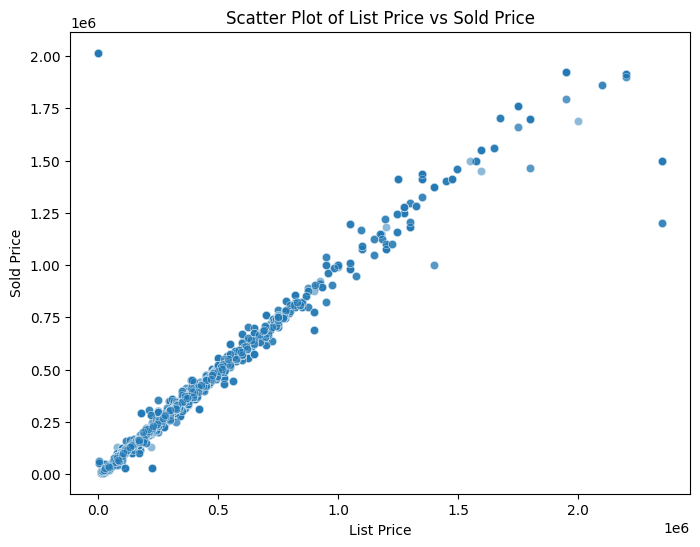

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["list_price"], y=y_train, alpha=0.5)

plt.xlabel("List Price")
plt.ylabel("Sold Price")
plt.title("Scatter Plot of List Price vs Sold Price")
plt.show()


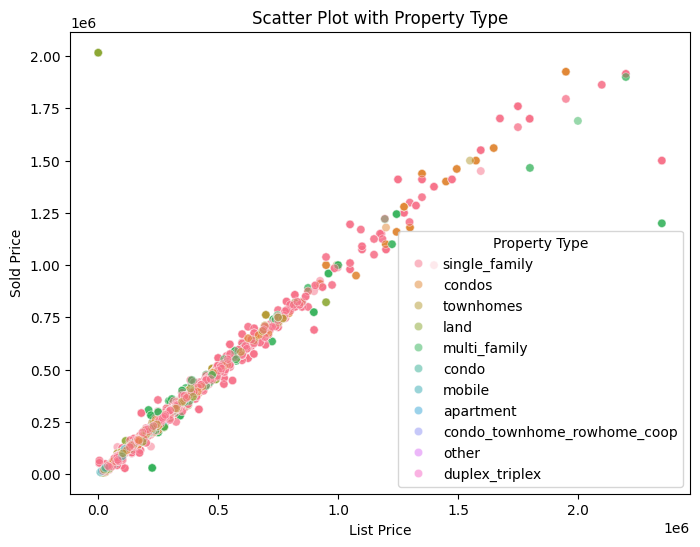

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train["list_price"], y=y_train, hue=X_train["type"], alpha=0.5)

plt.xlabel("List Price")
plt.ylabel("Sold Price")
plt.title("Scatter Plot with Property Type")
plt.legend(title="Property Type")
plt.show()


## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [31]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [64]:
from google.colab import files

files.download("X_train.csv")
files.download("X_test.csv")
files.download("y_train.csv")
files.download("y_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>